# Importing Libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from typing import List, Optional

# Loading the Data

In [3]:
df = pd.read_csv('./datasets/Train-Set.csv')
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Understanding the Features of the Dataset


----------
**Features:**

    :ProductID: unique product ID
    :Weight: weight of products
    :FatContent: specifies whether the product is low on fat or not
    :ProductVisibility: percentage of total display area of all products in a store allocated to the particular product
    :ProductType: the category to which the product belongs
    :MRP: Maximum Retail Price (listed price) of the products
    :OutletID: unique store ID
    :EstablishmentYear: year of establishment of the outlets
    :OutletSize: the size of the store in terms of ground area covered
    :LocationType: the type of city in which the store is located
    :OutletType: specifies whether the outlet is just a grocery store or some sort of supermarket
    :OutletSales: (target variable) sales of the product in the particular store
---------

# Exploratory Data Analysis/Exploration

In [5]:
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.tail()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
print(list(df.columns))

['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType', 'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType', 'OutletType', 'OutletSales']


In [7]:
df.shape

(8523, 12)

In [9]:
# Checking for the number of NaN or null values
print(df.isna().values.sum(), '----', df.isnull().values.sum())

3873 ---- 3873


In [13]:
# Finding the columns with the NaN values
nan_cols = []
print("-" * 50)

for col in df.columns:
    if df[col].isna().sum() > 1:
        nan_cols.append(col)
        print(f'Column: {col} | Number of NaN values: {df[col].isna().sum()}\n{"-" * 50}')

--------------------------------------------------
Column: Weight | Number of NaN values: 1463
--------------------------------------------------
Column: OutletSize | Number of NaN values: 2410
--------------------------------------------------


In [16]:
# Function to handle missing values in columns
def impute_missing_values(column: pd.Series, method: str = None, value: str = None) -> pd.Series:
    if value:
        column = column.fillna(value)
    else:
        imputer = SimpleImputer(missing_values=np.nan, strategy=method)
        column = imputer.fit_transform((column.values).reshape(-1, 1))

    return column

# Handling the missing values in Weight and OutletSize columns
df['Weight'] = impute_missing_values(column=df['Weight'], method='median')
df['OutletSize'] = impute_missing_values(column=df['OutletSize'], value='Medium')

df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             8523 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         8523 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [18]:
# Checking for duplicates
df.duplicated().any()

False

## Understanding the FatContent Feature

In [19]:
df['FatContent'].value_counts()

FatContent
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [20]:
# Handling FatContent feature input values
fat_content = []

for val in df['FatContent']:
    if val in ['Low Fat', 'LF', 'low fat']:
        val = 'Low Fat'
    elif val in ['Regular', 'reg']:
        val = 'Regular'
    fat_content.append(val)
    
df['FatContent'] = fat_content
df['FatContent'].value_counts()

FatContent
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [21]:
# Visualizing the fat content classes
fatcon = px.histogram(
    df, 
    x='FatContent',
    color='FatContent',
    title='Big Mart Products Fat Content Categories',
    color_discrete_sequence=px.colors.qualitative.Antique,
    height=550, 
    width=1000,
)
fatcon.update_layout(
    yaxis_title='Number of Products',
)
fatcon.show()

## Understanding the ProductType Feature

In [22]:
df['ProductType'].value_counts()

ProductType
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [35]:
print(f'There are {len(list(df.ProductType.value_counts())) - 1}+ (Others) types of products')

There are 15+ (Others) types of products


In [36]:
# Visualizing the categories of products
ptype = px.histogram(
    df, 
    x='ProductType',
    color='ProductType',
    title='Big Mart Product Categories',
    color_discrete_sequence=px.colors.qualitative.Bold,
    height=550, 
    width=1000,
)
ptype.update_layout(
    yaxis_title='Number of Products',
)
ptype.show()

## Understanding the OutletType Feature

In [39]:
df['OutletType'].value_counts()

OutletType
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [40]:
# Visualizing outlet type
out_type = px.histogram(
    df, 
    x='OutletType',
    color='OutletType',
    title='Big Mart Product Outlet Types',
    color_discrete_sequence=px.colors.qualitative.Safe,
    height=550, 
    width=1000,
)
out_type.update_layout(
    yaxis_title='Number of Products',
)
out_type.show()

## Understanding the OutletSize Feature

In [65]:
df['OutletSize'].value_counts()

OutletSize
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [64]:
# Visualizing the sizes of the outlets
out_size = px.histogram(
    df, 
    x='OutletSize',
    color='OutletSize',
    title='Outlet Sizes (Ground Area Covered)',
    color_discrete_sequence=px.colors.qualitative.Vivid_r,
    height=550, 
    width=1000,
)
out_size.update_layout(
    yaxis_title='Number of Products',
)
out_size.show()

# Statistical Analysis for Modelling

## Skewness of Numerical Features

In [67]:
int_cols = list(df.select_dtypes(include=['number']).columns)
int_cols.remove('EstablishmentYear')
int_cols

['Weight', 'ProductVisibility', 'MRP', 'OutletSales']

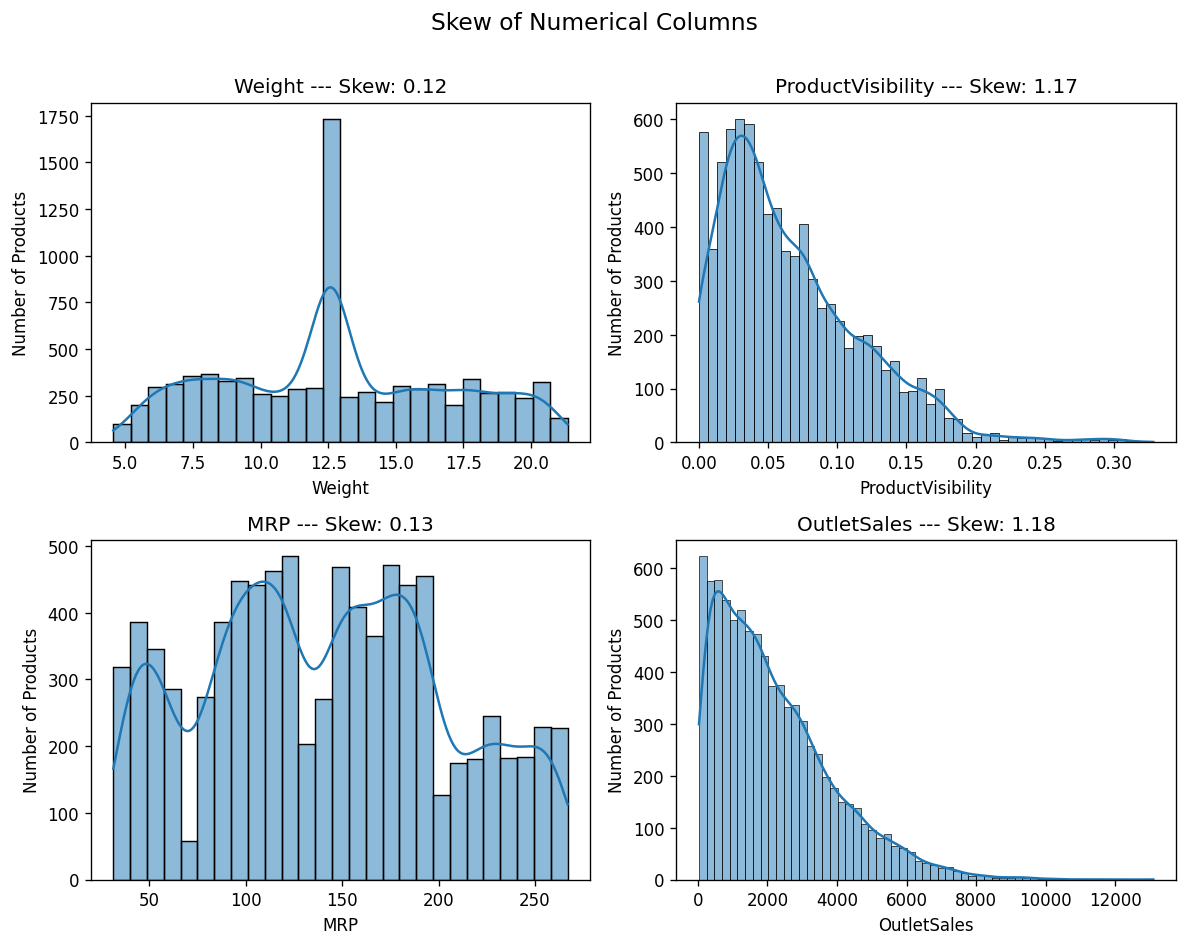

In [92]:
# Visualizing the skewness of the columns
fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=120)

i = 0
j = 0

for col in int_cols:
    skew = df[col].skew()
    sns.histplot(df, x=col, kde=True, ax=axs[i, j])
    axs[i, j].set_title('{col} --- Skew: {:.2f}'.format(skew, col=col))
    axs[i, j].set_ylabel('Number of Products')

    j += 1
    if j == 2:
        i += 1
        j = 0

plt.suptitle('Skew of Numerical Columns\n', fontsize=14)
plt.tight_layout()
plt.show()

In [95]:
# Checking for and handling ouliers in the ProductVisibility Column
def handle_outliers(dataframe: pd.DataFrame, columns: List[str], exclude: Optional[str] = None):
    
    for col in columns:
        if col == exclude:
            continue

        q1 = dataframe[col].quantile(.25)
        q3 = dataframe[col].quantile(.75)

        iqr = q3 - q1

        lower_bound = q1 - (iqr * 1.5)
        upper_bound = q3 + (iqr * 1.5)

        # Replace with upper or lower bounds if value exceeds...
        dataframe[col] = np.where(
            dataframe[col] > upper_bound, 
            upper_bound, 
            np.where(
                dataframe[col] < lower_bound,
                lower_bound,
                dataframe[col]
            ) 
        )

handle_outliers(df, columns=['ProductVisibility'])

In [104]:
# Checking skew of ProductVisibility column
pV_skew = df['ProductVisibility'].skew()
pV_skew

0.813979627580485

<Figure size 768x576 with 0 Axes>

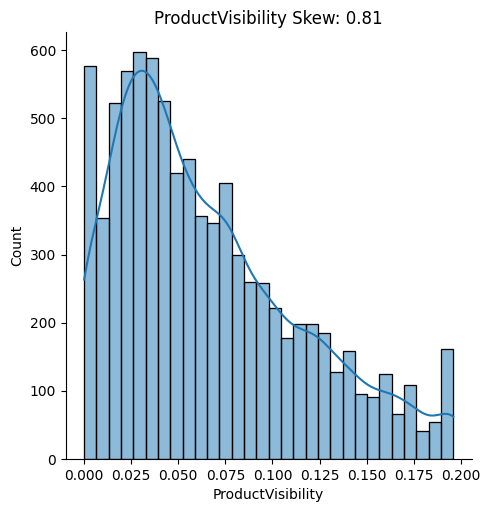

In [105]:
plt.figure(dpi=120)
sns.displot(df, x='ProductVisibility', kde=True)
plt.title('ProductVisibility Skew: {:.2f}'.format(pV_skew))
plt.show()

Still moderate positive skew in the ProductVisibility Column

In [106]:
# Performing square root transformation
pV_transformed = np.sqrt(df['ProductVisibility'])
df.insert(4, 'PV_transformed', pV_transformed)
df.head()

,ProductID,Weight,FatContent,ProductVisibility,PV_transformed,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [138]:
pV_skew_transformed = df['PV_transformed'].skew()

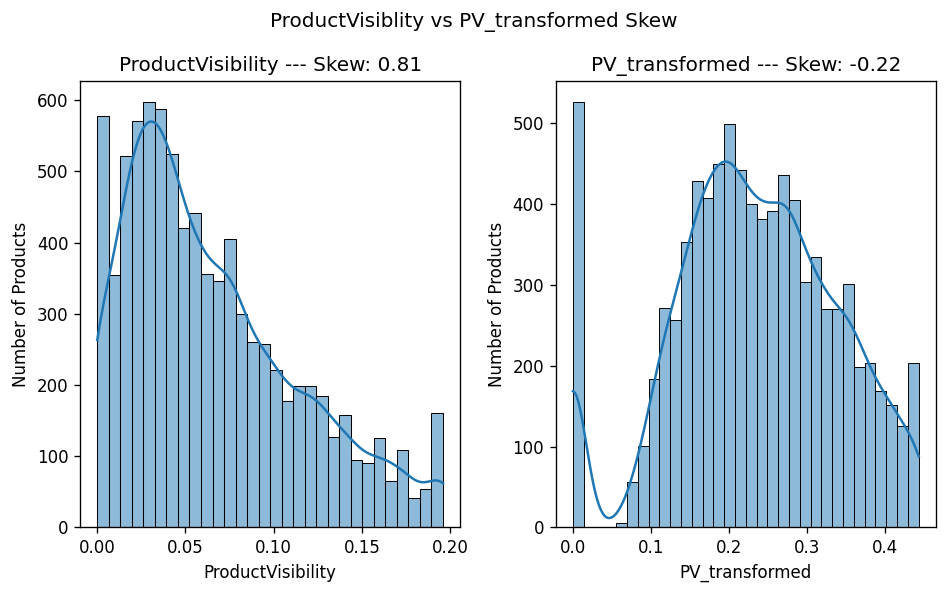

In [137]:
# Comparing the skew of the transformed data
plt.figure(dpi=120, figsize=(8, 5))

plt.subplot(1, 2, 1)
sns.histplot(df, x='ProductVisibility', kde=True)
plt.ylabel('Number of Products')
plt.title('ProductVisibility --- Skew: {:.2f}'.format(pV_skew))

plt.subplot(1, 2, 2)
sns.histplot(df, x='PV_transformed', kde=True)
plt.ylabel('Number of Products')
plt.title('PV_transformed --- Skew: {:.2f}'.format(pV_skew_transformed))

plt.suptitle('ProductVisiblity vs PV_transformed Skew')
plt.tight_layout()
plt.show()

After testing different transformation methods, square root gave the best for the OutletSales feature

In [140]:
# Handling skewness in OutletSales feature using square root transformation
sales_transformed = np.sqrt(df['OutletSales'])
df.insert(13, 'sales_transformed', sales_transformed)
df.head()

,ProductID,Weight,FatContent,ProductVisibility,PV_transformed,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,sales_transformed
0,FDA15,9.30,Low Fat,0.016047,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,61.115775
1,DRC01,5.92,Regular,0.019278,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,21.057607
2,FDN15,17.50,Low Fat,0.016760,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,45.795961
3,FDX07,19.20,Regular,0.000000,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,27.062520
4,NCD19,8.93,Low Fat,0.000000,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31.538947


In [142]:
sales_skew = df['OutletSales'].skew()
sales_skew_transformed = df['sales_transformed'].skew()

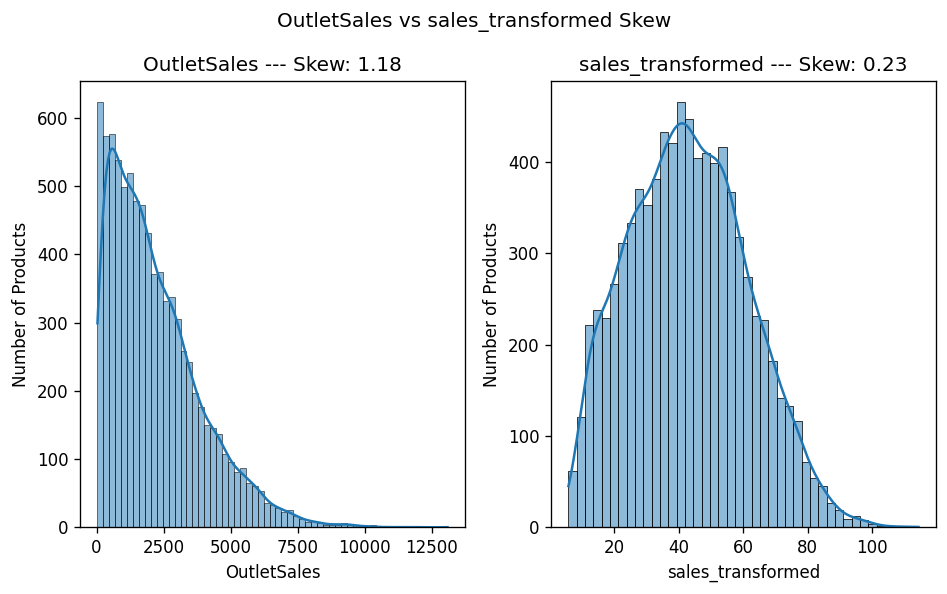

In [143]:
# Comparing the skew of the transformed data
plt.figure(dpi=120, figsize=(8, 5))

plt.subplot(1, 2, 1)
sns.histplot(df, x='OutletSales', kde=True)
plt.ylabel('Number of Products')
plt.title('OutletSales --- Skew: {:.2f}'.format(sales_skew))

plt.subplot(1, 2, 2)
sns.histplot(df, x='sales_transformed', kde=True)
plt.ylabel('Number of Products')
plt.title('sales_transformed --- Skew: {:.2f}'.format(sales_skew_transformed))

plt.suptitle('OutletSales vs sales_transformed Skew')
plt.tight_layout()
plt.show()

# Changing EstablishmentYear Feature to OutletAge